In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
data = pd.read_csv("data/EURUSD_daily.csv", index_col='Date')

In [85]:
data.index = pd.to_datetime(data.index)

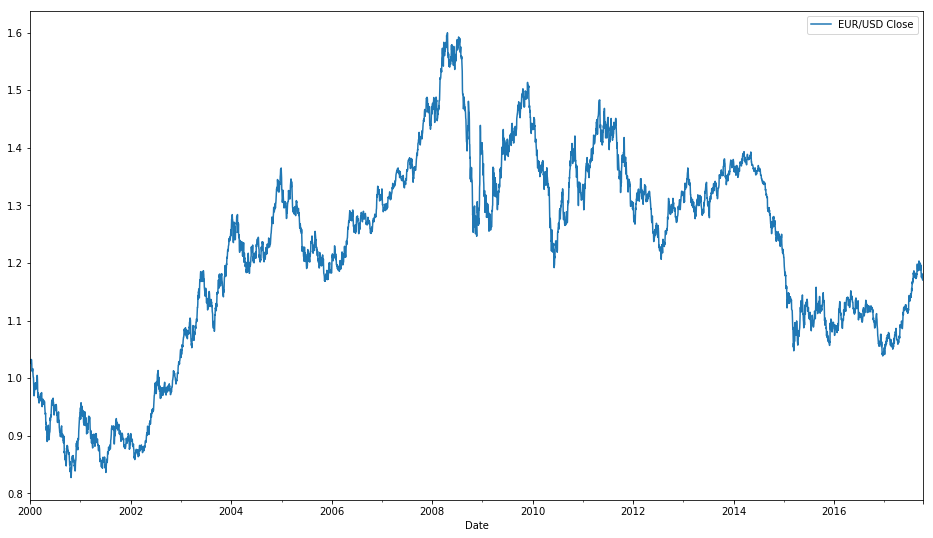

In [86]:
data.plot(figsize=(16,9))

In [87]:
data['shifted'] = data.shift(-1)

In [88]:
data.columns = ['t', 't+1']

In [89]:
data.dropna(inplace=True)

In [90]:
data.head()

,t,t+1
Date,,
2000-01-03,1.0276,1.0299
2000-01-04,1.0299,1.0317
2000-01-05,1.0317,1.0299
2000-01-06,1.0299,1.0283
2000-01-07,1.0283,1.0256


In [91]:
# direction: 1 for rising 0 for falling 
def isRising(row):
    if row['t+1'] >= row['t']:
        val = 1
    else:
        val = 0
    return val

In [92]:
data['direction'] = data.apply(isRising, axis=1)

In [93]:
split_date = pd.Timestamp('10-10-2015')
train = data.loc[:split_date]
test = data.loc[split_date:]

In [94]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_scaled = sc.fit_transform(train)
test_scaled = sc.transform(test)

In [95]:
train_scaled_df = pd.DataFrame(train_scaled, columns=['t','t+1','dir'], index = train.index)
test_scaled_df = pd.DataFrame(test_scaled, columns=['t','t+1','dir'], index = test.index)

In [96]:
for s in range(1,60):
    train_scaled_df['t-{}'.format(s)] = train_scaled_df['t'].shift(s)
    test_scaled_df['t-{}'.format(s)] = test_scaled_df['t'].shift(s)

In [97]:
train_scaled_df.head()

,t,t+1,dir,t-1,t-2,t-3,t-4,t-5,t-6,t-7,...,t-50,t-51,t-52,t-53,t-54,t-55,t-56,t-57,t-58,t-59
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.259034,0.262013,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,0.262013,0.264344,1.0,0.259034,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,0.264344,0.262013,0.0,0.262013,0.259034,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,0.262013,0.259940,0.0,0.264344,0.262013,0.259034,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,0.259940,0.256443,0.0,0.262013,0.264344,0.262013,0.259034,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
X_train = train_scaled_df.dropna().drop('t+1', axis=1).drop('dir', axis=1)
y_train = train_scaled_df.dropna()[['dir']]

X_test = test_scaled_df.dropna().drop('t+1', axis=1).drop('dir', axis=1)
y_test = test_scaled_df.dropna()[['dir']]

In [99]:
#converts to numpy array
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

In [100]:
X_train.shape

(4056, 60)

In [101]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import keras.backend as K

In [125]:
K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim=60, activation='tanh'))
model.add(Dense(1024, activation='tanh'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])



In [126]:
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Train on 3650 samples, validate on 406 samples
Epoch 1/100
3650/3650 [==============================] - 0s - loss: 0.7143 - acc: 0.4992 - val_loss: 0.6966 - val_acc: 0.4631
Epoch 2/100
3650/3650 [==============================] - 0s - loss: 0.6982 - acc: 0.5175 - val_loss: 0.6951 - val_acc: 0.4631
Epoch 3/100
3650/3650 [==============================] - 0s - loss: 0.6931 - acc: 0.5395 - val_loss: 0.7396 - val_acc: 0.4631
Epoch 4/100
3650/3650 [==============================] - 0s - loss: 0.6952 - acc: 0.5068 - val_loss: 0.6948 - val_acc: 0.4631
Epoch 5/100
3650/3650 [==============================] - 0s - loss: 0.6980 - acc: 0.4975 - val_loss: 0.6993 - val_acc: 0.4631
Epoch 6/100
3650/3650 [==============================] - 0s - loss: 0.6934 - acc: 0.5184 - val_loss: 0.6942 - val_acc: 0.4631
Epoch 7/100
3650/3650 [==============================] - 0s - loss: 0.6927 - acc: 0.5186 - val_loss: 0.6950 - val_acc: 0.4631
Epoch 8/100
3650/3650 [==============================] - 0s - loss: 0.6

3650/3650 [==============================] - 0s - loss: 0.6925 - acc: 0.5186 - val_loss: 0.6966 - val_acc: 0.4631
Epoch 66/100
3650/3650 [==============================] - 0s - loss: 0.6925 - acc: 0.5186 - val_loss: 0.6964 - val_acc: 0.4631
Epoch 67/100
3650/3650 [==============================] - 0s - loss: 0.6925 - acc: 0.5186 - val_loss: 0.6962 - val_acc: 0.4631
Epoch 68/100
3650/3650 [==============================] - 0s - loss: 0.6925 - acc: 0.5186 - val_loss: 0.6961 - val_acc: 0.4631
Epoch 69/100
3650/3650 [==============================] - 0s - loss: 0.6925 - acc: 0.5186 - val_loss: 0.6962 - val_acc: 0.4631
Epoch 70/100
3650/3650 [==============================] - 0s - loss: 0.6925 - acc: 0.5186 - val_loss: 0.6964 - val_acc: 0.4631
Epoch 71/100
3650/3650 [==============================] - 0s - loss: 0.6925 - acc: 0.5186 - val_loss: 0.6966 - val_acc: 0.4631
Epoch 72/100
3650/3650 [==============================] - 0s - loss: 0.6925 - acc: 0.5186 - val_loss: 0.6967 - val_acc: 0.46

In [127]:
y_pred = model.predict(X_test)
X_test.shape

(461, 60)

In [128]:
y_pred

array([[ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0.51844901],
       [ 0

In [129]:
y_pred[:,0] = y_pred[:,0]>0.5

In [130]:
y_pred

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
      

In [131]:
eval_df = pd.DataFrame(y_pred, columns=['predicted'])


In [132]:
eval_df['target'] = y_test

In [133]:
eval_df['result'] = eval_df['predicted'] == eval_df['target']

In [134]:
eval_df[eval_df['target']==False].count()

predicted    220
target       220
result       220
dtype: int64